In [1]:
# 多层感知机 MLP 可以用于分类和回归，MLP也被称为普通前馈神经网络
# MLP可以被视为广义的线性模型，执行多层处理后得到的结论

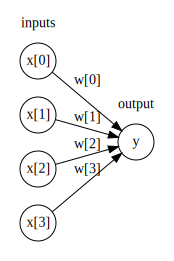

In [2]:
import mglearn
display(mglearn.plots.plot_logistic_regression_graph())

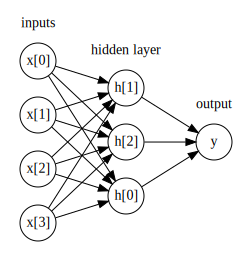

In [3]:
# 多次重复计算加权求和的过程，首先计算代表中间过程的隐单元，在计算这些隐单元的加权求和并得到最终结果
display(mglearn.plots.plot_single_hidden_layer_graph())

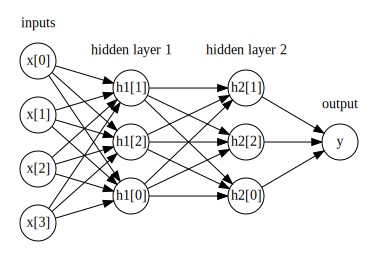

In [4]:
# 在计算完每个隐单元的加权求和之后，对结果再应用一个非线性函数
# 比如校正非线性 或者 双切双曲线
mglearn.plots.plot_two_hidden_layer_graph()

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

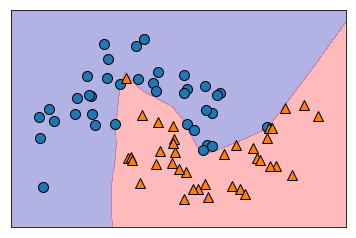

In [6]:
mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

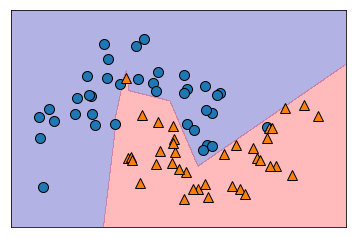

In [10]:
# 模型默认使用100个隐节点
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

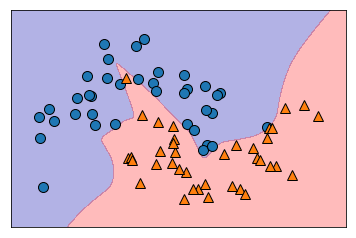

In [12]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[100, 10], activation='tanh').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

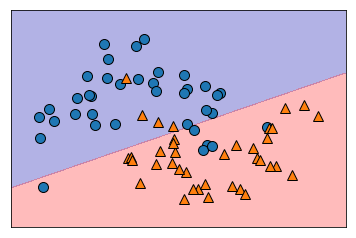

In [13]:
# 目前调参需要调整，隐层的层数，隐层节点个数，以及使用非线性函数 tanh
# 另外可以调整alpha参数，即正则化参数，L2惩罚使得权重趋于0，控制模型复杂度
# alpha越大，表示正则化越强，则每个点的影响会越小，这样降低了模型的复杂度

mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[100, 10], activation='tanh', alpha=1).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [14]:
# 另外神经网络哦也要求所有输入特征的变化范围相似
# 如果某个特征对所有的隐单元的权重都很小，那么这个特征对模型来说就不太重要

In [15]:
# 神经网络调参常用方法是：首先创建一个大到足以过拟合的网络，确保这个网络可以对任务进行学习
# 然后要么缩小网络，要么增大alpha来增强正则化

# solver的选项：
# adam 默认，但是对数据的缩放相当敏感
# lbfgs 鲁棒性相当好，但是时间可能会长
# sgd，深度学习

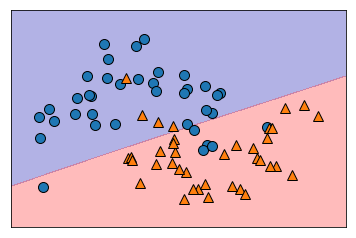

In [17]:
mlp = MLPClassifier(solver="adam", random_state=0, hidden_layer_sizes=[100, 10], activation='tanh').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)